# Basic classification: Classify images of clothing

This guide trains a neural network model to classify images of clothing, like sneakers and shirts.

__source__: https://www.tensorflow.org/tutorials/keras/classification

In [29]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

### Import the Fashion MNIST dataset

In [30]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [31]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Explore the data

In [32]:
print("train_images shape is {} and train_label length is {}".format(train_images.shape, len(train_labels)))

train_images shape is (60000, 28, 28) and train_label length is 60000


In [33]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [34]:
print("test_images shape is {} and test_labels length is {}".format(test_images.shape, len(test_labels)))

test_images shape is (10000, 28, 28) and test_labels length is 10000


### Preprocess the data

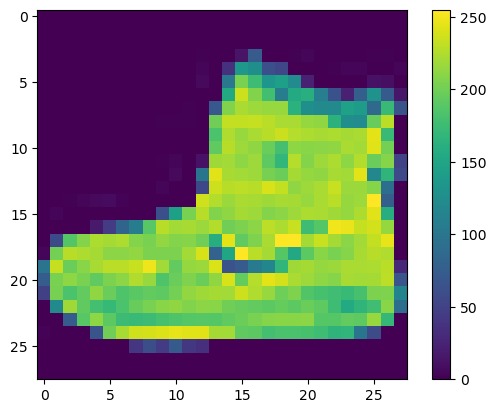

In [35]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [36]:
train_images = train_images / 255.0
test_images = test_images / 255.0

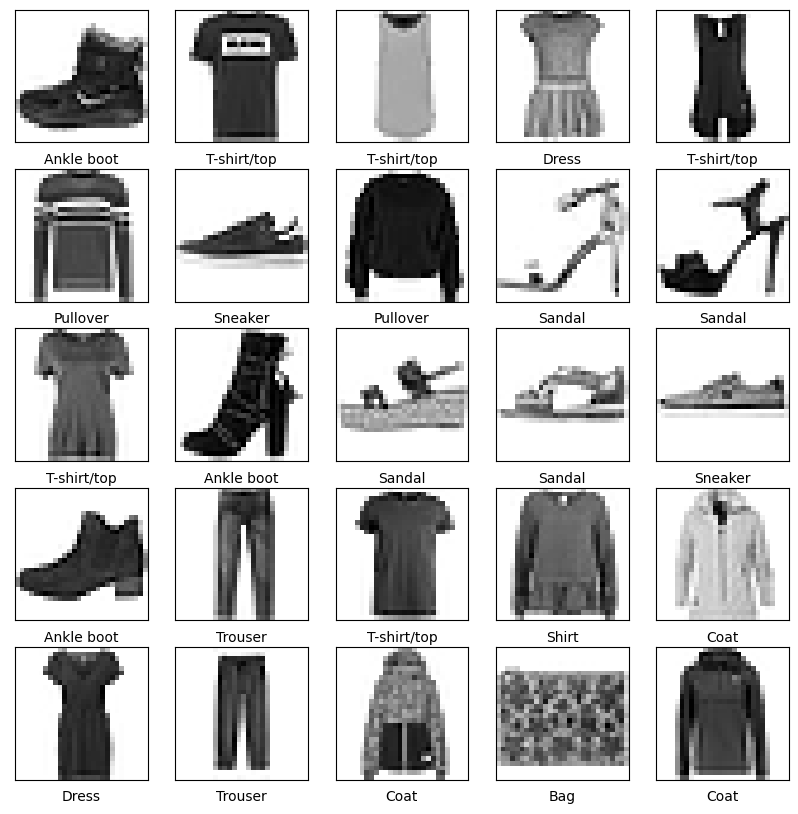

In [37]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Build the model

#### Set up the layers

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

#### Compile the model

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Train the model

__Feed the model__

In [40]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6334 - accuracy: 0.7806
Epoch 2/10
1875/1875 [==============================] - 2s 917us/step - loss: 0.3823 - accuracy: 0.8626
Epoch 3/10
1875/1875 [==============================] - 2s 968us/step - loss: 0.3436 - accuracy: 0.8732
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3146 - accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 2s 920us/step - loss: 0.2949 - accuracy: 0.8897
Epoch 6/10
1875/1875 [==============================] - 2s 993us/step - loss: 0.2804 - accuracy: 0.8974
Epoch 7/10
1875/1875 [==============================] - 2s 967us/step - loss: 0.2635 - accuracy: 0.9013
Epoch 8/10
1875/1875 [==============================] - 2s 967us/step - loss: 0.2543 - accuracy: 0.9060
Epoch 9/10
1875/1875 [==============================] - 2s 931us/step - loss: 0.2466 - accuracy: 0.9089
Epoch 10/10
1875/1875 [==============================] - 2s 848us/st

__Evaluate Accuracy__

In [41]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3283 - accuracy: 0.8861

Test accuracy: 0.8860999941825867


__Make predictions__

In [42]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [43]:
predictions[0]

array([5.1154743e-08, 4.0357818e-08, 3.1348637e-07, 8.4136502e-08,
       3.0633134e-07, 4.4428214e-04, 1.6883925e-07, 2.6649821e-03,
       3.1283154e-08, 9.9688977e-01], dtype=float32)

In [44]:
np.argmax(predictions[0])

9

In [45]:
test_labels[0]

9

In [46]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100 * np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

__Verify predictions__

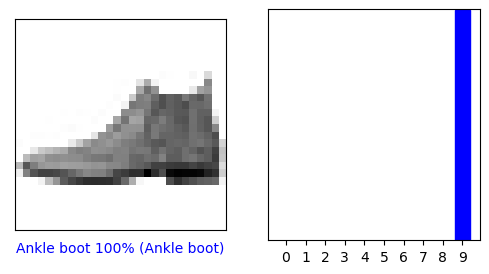

In [47]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

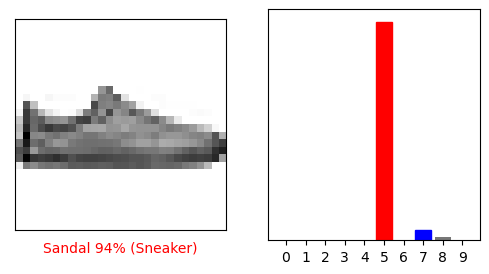

In [48]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

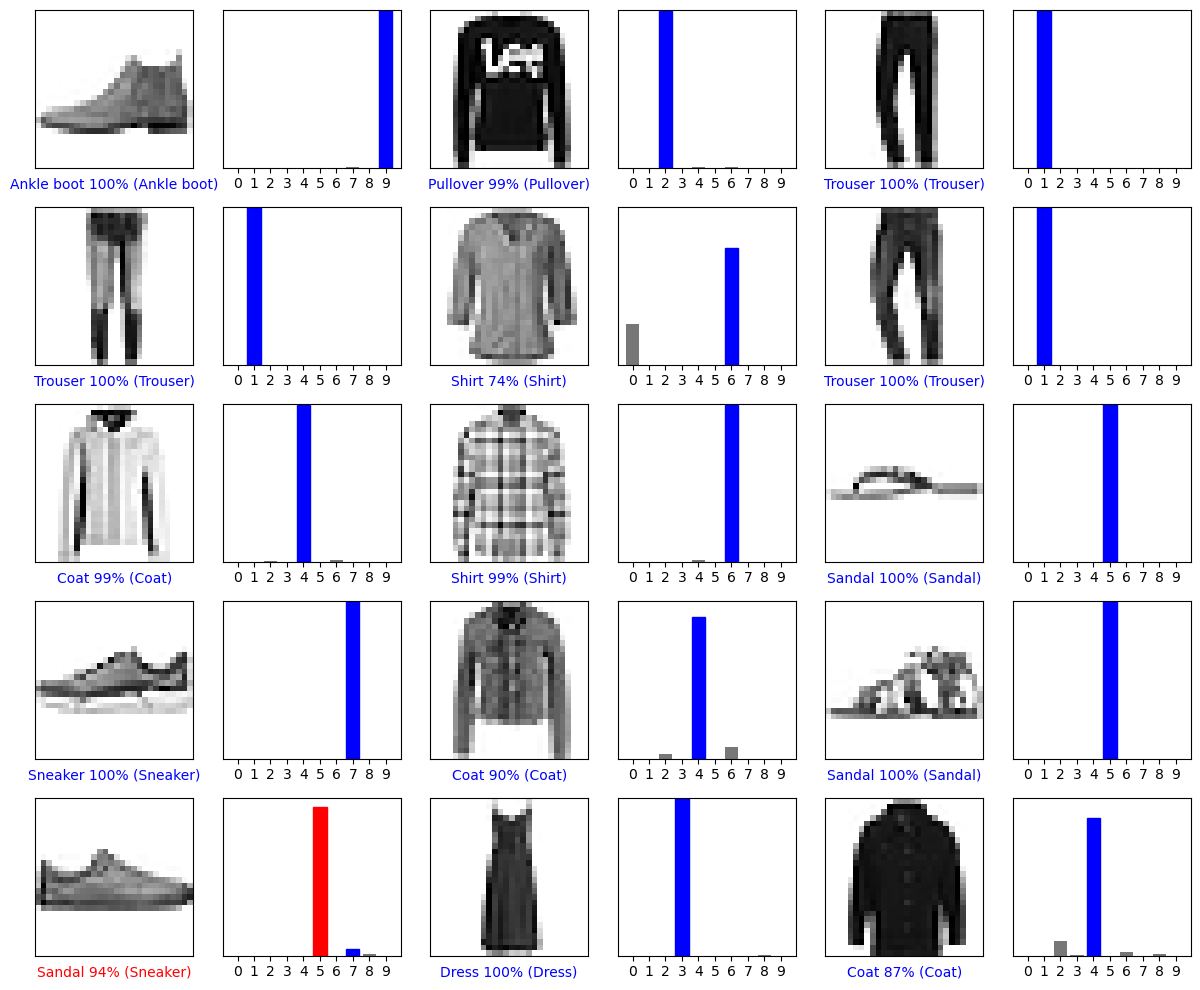

In [49]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()

### Use the trained model

In [50]:
# Grab an image from the test dataset.
img = test_images[1]
print(img.shape)

(28, 28)


In [51]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [52]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[8.9099449e-05 4.5796318e-11 9.9394602e-01 5.0931986e-10 1.1352599e-03
  5.6270103e-14 4.8295846e-03 7.8598172e-17 1.6575601e-08 1.4130102e-12]]


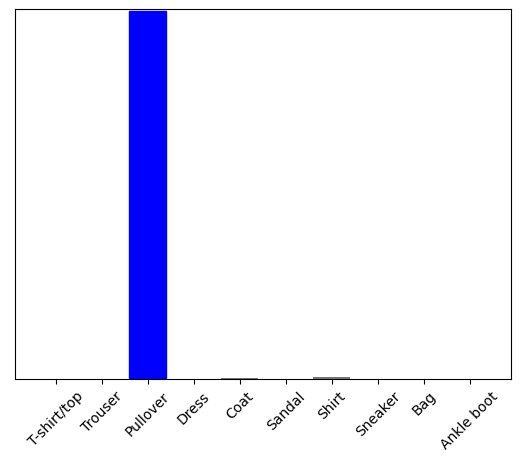

In [53]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [54]:
np.argmax(predictions_single[0])

2